# 模型正则化 Regularization
模型正则化：限制参数的大小。优先应该使用岭回归

## 岭回归 Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5*x + 3 + np.random.normal(0, 1, size=100)

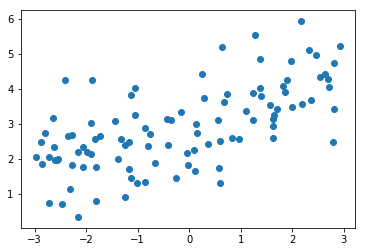

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# 多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401086890128

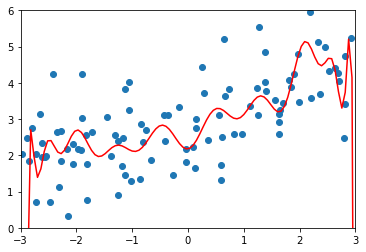

In [6]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [7]:
def plot_model(model):
    """对模型绘图的通用代码"""
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

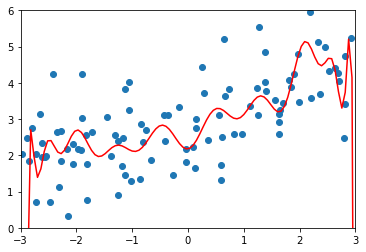

In [8]:
plot_model(poly_reg)

### 使用岭回归

In [9]:
# 岭回归包
from sklearn.linear_model import Ridge

# 初始化岭回归示例
ridge = Ridge(alpha=1) 

In [10]:
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha)),
    ])

In [11]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754155471

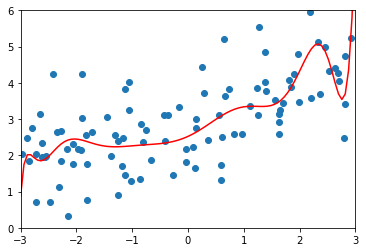

In [12]:
plot_model(ridge1_reg)

In [13]:
ridge1_reg = RidgeRegression(20, 1)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1888759304218448

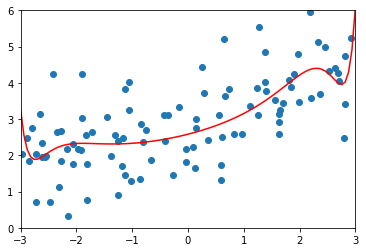

In [14]:
plot_model(ridge1_reg)

In [15]:
ridge1_reg = RidgeRegression(20, 100)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3196456113086197

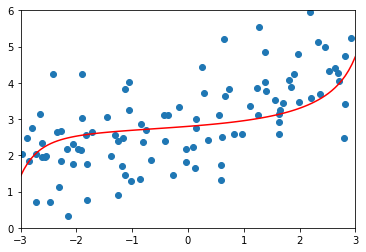

In [16]:
plot_model(ridge1_reg)

In [17]:
ridge1_reg = RidgeRegression(20, 1e8)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.840889124848122

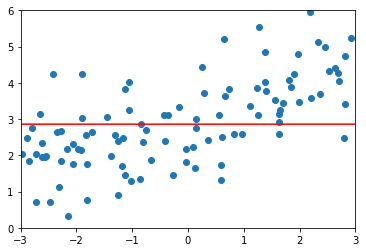

In [18]:
plot_model(ridge1_reg)

## LASSO Regularization
LASSO的缩写是：
Last Absolute Shrinkage and Selection Operator Regression

**这种正则化方式趋向于将一部分x的系数置为0**，但有可能将有用的特征的系数变为0。

In [19]:
# Lasso包
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha)),
    ])

In [20]:
lasso_reg = LassoRegression(20, 0.01)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.1496080843259966

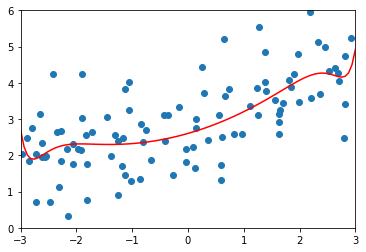

In [21]:
plot_model(lasso_reg)

In [22]:
lasso_reg = LassoRegression(20, 0.1)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.1213911351818648

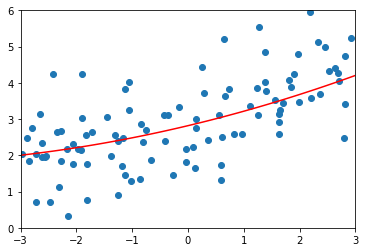

In [23]:
plot_model(lasso_reg)

In [24]:
lasso_reg = LassoRegression(20, 1)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.8408939659515595

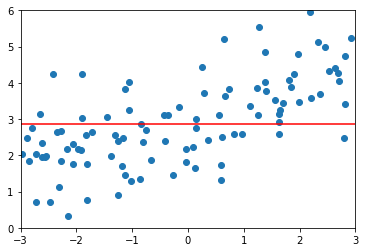

In [25]:
plot_model(lasso_reg)